In [1]:
#import data

import xlsxwriter
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

GTO = ('/Users/mathijsvanboesschoten/Documents/Efteling/data_email (nieuwste data Caro).xlsx')
Selligent = ('/Users/mathijsvanboesschoten/Documents/Efteling/selligent_voor_GTO.xlsx')

#import excel files
data = pd.ExcelFile(GTO)
data2 = pd.ExcelFile(Selligent)

#parse excel files
GTO = data.parse('tib5b7c8')
Selligent = data2.parse('data')
Selligent_extra = data2.parse('extra_data')

In [2]:
print("respondents before removal unfinished:",len(GTO))

respondents before removal unfinished: 29353


In [3]:
#rename columns
GTO = GTO.rename(index=str, columns={"No 16": "Abonnement?","No 30": "Aantal_personen_bezoek", "No 32_1_1": "0-4 jaar","No 32_2_1":"5-9 jaar","No 32_3_1": "10-14 jaar", "No 32_4_1": "15-19 jaar","No 32_5_1":"20-24 jaar","No 32_6_1": "25-29 jaar", "No 32_7_1": "30-34 jaar","No 32_8_1":"35-39 jaar","No 32_9_1": "40-44 jaar", "No 32_10_1": "45-49 jaar","No 32_11_1":"50-54 jaar","No 32_12_1": "55-59 jaar","No 32_13_1":"60-64 jaar","No 32_14_1":"65-69 jaar","No 32_15_1": "70+ jaar","No 40": "cijfer bezoek", "No 41": "prijs/kwaliteit","No 52_1":"cijfer attracties","No 52_2": "cijfer parkshows","No 52_3": "cijfer omgeving", "No 52_4": "cijfer sfeer", "No 52_5": "cijfer medewerkers","No 52_6":"cijfer horeca","No 52_7": "cijfer souvenirwinkels","No 52_8": "cijfer gevoel van veiligheid","No 52_9": "cijfer entertainmentacts","No 37": "drukte perceptie","No 38":"weer perceptie"})

In [4]:
# convert text to numbers
categories_drukte = ['Heel rustig','Rustig','Niet rustig, niet druk', 'Druk', 'Heel druk']
categories_weer = ['Heel slecht','Slecht','Niet goed, niet slecht', 'Goed', 'Heel goed']

for categorie in categories_drukte:
    GTO['drukte perceptie'] = GTO['drukte perceptie'].replace(categorie, (categories_drukte.index(categorie) + 1))

for categorie in categories_weer:
    GTO['weer perceptie'] = GTO['weer perceptie'].replace(categorie, (categories_weer.index(categorie) + 1))    
    

In [5]:
#Rename date columns
GTO = GTO.rename(index=str, columns={"Date Ended": "Date_ended", "Date Started": "Date_started"})
GTO = GTO.rename(index=str, columns={"No 27": "year", "No 26": "month","No 25":"day"})

#### drop all Nan's in date of visit questions:

In [6]:
GTO = GTO[GTO.month != "-"]
print("now the number of respondents is:",len(GTO))

now the number of respondents is: 21035


### Clean wrongly entered dates

In [7]:
#convert to datetime
GTO['Status_date'] = GTO['Status_date'].dt.date

# Covert months to numbers
d = {'Januari':'01', 'Februari':'02', 'Maart':'03', 'April':'04', 'Mei':'05','Juni':'06', 'Juli':'07', 'Augustus':'08', 'September':'09', 'Oktober':'10', 'November':'11',"December":'12'}
GTO['month'] = GTO.month.map(d)

In [8]:
#Convert days to two digits 
GTO['day']=GTO['day'].apply(lambda x: '{0:0>2}'.format(x))

In [9]:
# combine day month year to date, convert not existing dates to NaT (erros='coerce')
GTO['date_visit'] = pd.to_datetime(GTO[['year', 'month', 'day']],format='%d-%m-%Y', errors='coerce').dt.date

In [10]:
#print amount of unique dates
print("number of unique dates",len(GTO['date_visit'].unique()))

number of unique dates 1462


#### Drop the values with wrong data 

In [11]:
#drop values with wrong date (NaT values)
GTO = GTO.dropna(subset=['date_visit'])

In [12]:
print("number respondents after cleaning for wrong dates (31 february etc):", len(GTO['date_visit']))

number respondents after cleaning for wrong dates (31 february etc): 21027


#### Compare date of visit with date of date of response


In [13]:
# create variable which shows difference between response and visit of Efteling
GTO['Difference_date'] = GTO['Status_date'] - GTO['date_visit']

#convert days to days
GTO['Difference_date'] = GTO['Difference_date'].dt.days

#show stattisics
GTO['Difference_date'].describe()

count    21027.000000
mean         9.610453
std         47.343560
min      -1462.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       1075.000000
Name: Difference_date, dtype: float64

In [14]:
#remove wrong dates 
GTO = GTO[GTO.Difference_date >= 0]
GTO = GTO[GTO.Difference_date <= 50]
print("Number of respondents after removal wrong dates:",len(GTO['Difference_date']))

Number of respondents after removal wrong dates: 20127


#### Rename columns

In [15]:
GTO = GTO.rename(index=str, columns={"No 16": "Abonnement?","No 30": "Aantal_personen_bezoek", "No 32_1_1": "0-4 jaar","No 32_2_1":"5-9 jaar","No 32_3_1": "10-14 jaar", "No 32_4_1": "15-19 jaar","No 32_5_1":"20-24 jaar","No 32_6_1": "25-29 jaar", "No 32_7_1": "30-34 jaar","No 32_8_1":"35-39 jaar","No 32_9_1": "40-44 jaar", "No 32_10_1": "45-49 jaar","No 32_11_1":"50-54 jaar","No 32_12_1": "55-59 jaar","No 32_13_1":"60-64 jaar","No 32_14_1":"65-69 jaar","No 32_15_1": "70+ jaar","No 40": "cijfer bezoek", "No 41": "prijs/kwaliteit","No 52_1":"cijfer attracties","No 52_2": "cijfer parkshows","No 52_3": "cijfer omgeving", "No 52_4": "cijfer sfeer", "No 52_5": "cijfer medewerkers","No 52_6":"cijfer horeca","No 52_7": "cijfer souvenirwinkels","No 52_8": "cijfer gevoel van veiligheid","No 52_9": "cijfer entertainmentacts","No 37": "drukte perceptie","No 38":"weer perceptie"})

In [16]:
#select used variables
GTO_selection = GTO[['Password','Difference_date','Status_date','date_visit','No 18','month','year','Abonnement?','cijfer bezoek','prijs/kwaliteit','cijfer attracties','cijfer parkshows','cijfer omgeving','cijfer sfeer', 'cijfer medewerkers','cijfer horeca','cijfer souvenirwinkels','cijfer gevoel van veiligheid','cijfer entertainmentacts','drukte perceptie','weer perceptie']]

#### Convert postal codes to province

In [17]:
#convert postcode to number only
GTO_selection['No 18'] = GTO_selection['No 18'].map(lambda x: ''.join([i for i in str(x) if i.isdigit()]))
GTO_selection['No 18'] = pd.to_numeric(GTO_selection['No 18'])

In [18]:
import numpy as np
# convert postcodes to province (code converted from SPSS Syntax)
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(1000,1299), 8, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(1300,1353), 7, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(1354,2157), 8, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(2159,3399), 9, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3400,3769), 6, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3770,3784), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3790,3835), 6, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3840,3888), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3890,3891), 7, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3892,3893), 7, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3900,3924), 6, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3925,3926), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(3927,3999), 6, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4000,4030), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4031,4043), 9, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4044,4130), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4131,4146), 9, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4147,4199), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4200,4241), 9, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4247,4247), 9, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4250,4286), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4300,4599), 10, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4600,4671), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4675,4675), 6, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4680,4681), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4690,4698), 10, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(4700,5299), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(5300,5335), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(5340,5764), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(5766,5815), 12, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(5820,5845), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(5850,6020), 12, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(6021,6029), 11, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(6030,6499), 12, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(6500,6586), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(6587,6599), 12, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(6600,7399), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(7400,7739), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(7740,7991), 3, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8000,8044), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8050,8051), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8061,8099), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8100,8153), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8160,8194), 5, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8196,8196), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8198,8198), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8200,8256), 7, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8260,8294), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8300,8322), 7, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8325,8378), 4, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8380,8387), 3, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8390,9299), 2, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(9300,9343), 3, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(9350,9367), 1, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(9400,9499), 3, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(9500,9504), 1, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(9510,9537), 3, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(9540,9999), 1, GTO_selection['No 18'])
GTO_selection['No 18'] = np.where(GTO_selection['No 18'].between(8052,8052), 2, GTO_selection['No 18'])

#Rename column No 18
GTO_selection = GTO_selection.rename(index=str, columns={"No 18": "provincie"})

#rename numbers provinces
GTO_selection['provincie'] = GTO_selection['provincie'].replace({1:'Groningen', 2:'Friesland', 3:'Drenthe', 4:'Overijssel',
                                                                5:'Gelderland',6:'Utrecht', 7:'Flevoland', 8:'Noord-Holland', 9:'Zuid-Holland',
                                                                10:'Zeeland',11:'Noord-Brabant', 12:'Limburg'})



In [19]:
#change"-" & "weet niet" to NaN
GTO_selection = GTO_selection.replace('-', np.NaN)
GTO_selection = GTO_selection.replace('Weet niet / Geen mening', np.NaN)
GTO_selection = GTO_selection.dropna(subset=['cijfer bezoek'])

In [20]:
print("Number observations after dropping no grade",len(GTO_selection))

Number observations after dropping no grade 20002


Text(0.5, 0, 'Satisfaction grade')

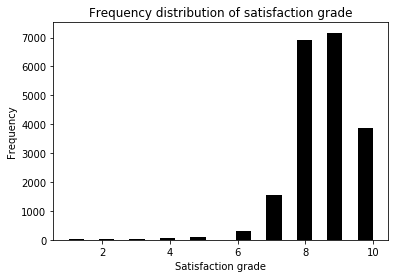

In [21]:
#plot frequency distribution (n=20.002)
GTO_selection['cijfer bezoek'].hist(bins=20, color='k')
plt.title("Frequency distribution of satisfaction grade")
plt.axes(projection=None)
plt.ylabel('Frequency')
plt.grid(b=None)
plt.xlabel('Satisfaction grade')



### Exclude subscription holders

In [22]:
GTO_selection = GTO_selection[GTO_selection['Abonnement?'] == "Nee"]
print("Number observations excluding subscriptions",len(GTO_selection))

Number observations excluding subscriptions 14937


#### drukte perceptie en weer perceptie values veranderen naar nummers

In [23]:
#convert text to numbers
categories_drukte = ['Heel rustig','Rustig','Niet rustig, niet druk', 'Druk', 'Heel druk']
categories_weer = ['Heel slecht','Slecht','Niet goed, niet slecht', 'Goed', 'Heel goed']

for categorie in categories_drukte:
    GTO_selection['drukte perceptie'] = GTO_selection['drukte perceptie'].replace(categorie, (categories_drukte.index(categorie) + 1))

for categorie in categories_weer:
    GTO_selection['weer perceptie'] = GTO_selection['weer perceptie'].replace(categorie, (categories_weer.index(categorie) + 1))    
    

### merge selligent data

In [24]:
#merge type bezoekers aan data_needed
new_file = GTO_selection.merge(Selligent, left_on='Password', right_on='UNIQUE_ID', how= 'left')
extra_data = GTO_selection.merge(Selligent_extra, left_on='Password', right_on='UNIQUE_ID', how= 'left')

In [25]:
#filter respondents age larger than 5
older_respondents = new_file[new_file['AGE_respondent'] > 5]
no_selligent = new_file[new_file['AGE_respondent'].isnull()]
new_file = pd.concat([older_respondents, no_selligent])

In [26]:
print("Number of respondents with info Selligent:",len(older_respondents))
print("Number of respondents without infoSelligent:",len(no_selligent))

Number of respondents with info Selligent: 4255
Number of respondents without infoSelligent: 10668


#### Write to Excel

In [27]:
# # Create a Pandas Excel writer using XlsxWriter as the engine.
# writer = pd.ExcelWriter('cleaned_data_GTO_NEW.xlsx', engine='xlsxwriter')

# # Convert the dataframe to an XlsxWriter Excel object.
# new_file.to_excel(writer, sheet_name='data')
# extra_data.to_excel(writer, sheet_name='extra_data')
# # Close the Pandas Excel writer and output the Excel file.
# writer.save()
